In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

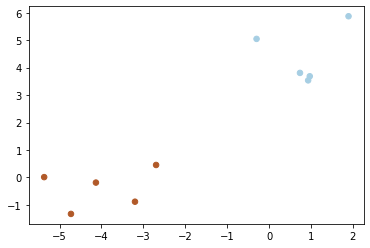

In [9]:
%matplotlib inline
nFeatures =2
nSamples =10
X, y = make_blobs(n_samples=nSamples, centers=2,n_features =nFeatures, random_state=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [10]:
class Perceptron():
    
    def __init__(self,ETA=0):
        self.ETA = ETA    
        
    def __setVector(self):
        self.__vector = np.zeros(self.n_features)
        
    def __setError(self): # wypełnienie wektora błędnie sklasyfikowanych punktów
        self.__setValues()
        self.__error =[]
        for index,value  in enumerate(self.__yPredicted):
            if self.y[index] != value:
                self.__error.append(index)#  zwraca indeksy
        print("calc error", self.__error)
        #self.__error = [i for i, j in zip(self.y, self.__yPredicted) if   i == j]
    
    def __calculateNewVector(self,indexSample):
        #self.__vector = self.__vector + self.ETA * (self.y[indexSample]*self.X[indexSample]) 
        temp = np.multiply(self.y[indexSample],self.X[indexSample])
        #print(temp)
        self.__vector = self.__vector + self.ETA * temp
        
    def __setLabel(self):#funkcja ustalająca etykiety y
        self.__yPredicted = np.zeros(self.size)
        self.__yPredicted[self.__s > 0] =1
        print("calc pred", self.__yPredicted)
        
    def __setValues(self): # wyliczona wartość którą będziemy podawać do funkcji decyzyjnej
        self.__s = []
        for x_row in  self.X:
            #print(x_row)
            self.__s.append(np.sum( self.__vector*x_row , axis =0))
            #print(self.__s)
        #self.__s = np.sum( np.multiply(self.__vector, self.X) , axis =0)
        self.__s = np.array(self.__s)
        self.__setLabel()
        
    def __getRandomErrorLabel(self):
        return np.random.choice(self.__error)
 
    def algorithm(self):
        self.__setVector() # ustawiamy wektor wag (początkowo zerowe wartości)
        self.k =0  #liczba wykonanych kroków aktualizacyjnych
        self.__setError()
        while len(self.__error) != 0 : # dopóki ziór błędnie sklasyfikowanych przykładów posiada indeksy
            indexSample = self.__getRandomErrorLabel() # wylosuj ze zbioru error przykład uczący [index]
            self.__calculateNewVector(indexSample) # popraw wagi 
            self.k +=1
            self.__setError()
            #print(self.__error)
        return self.__vector,self.k # zwróć otrzymany wektor wag i liczbę wykonanych kroków    
            
    def __addOnes(self,X):
        return np.hstack(( np.ones((X.shape[0],1),dtype=X.dtype),X))
            
    def fit(self,X,y):
        self.y =y
        self.X  = self.__addOnes(X)
        self.size = np.shape(self.X)[0]
        self.n_features = np.shape(self.X)[1]
        
        
    

In [11]:
print(y)

[1 0 0 0 1 1 0 1 0 1]


In [24]:
ETA =1 #współczynnik uczenia

rosenblat = Perceptron(ETA)
rosenblat.fit(X,y)
polynomials , k =rosenblat.algorithm() #zmienic na coef

calc pred [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
calc error [0, 4, 5, 7, 9]
calc pred [1. 0. 0. 0. 1. 1. 0. 1. 0. 1.]
calc error []


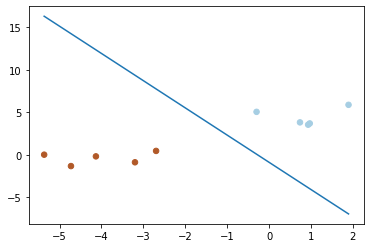

In [31]:
minX = np.min(X[:, 0])
maxX = np.max(X[:, 0])
xpoly = np.linspace(minX,maxX,100)

ypoly = polynomials[1] *xpoly + polynomials[2]
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.plot(xpoly,ypoly)